## Análisis de Datos Meteorológicos con una API Pública
Obtener datos del clima de una ciudad usando la API de Open-Meteo (https://open-meteo.com/) y analizar la temperatura.

* Haz una petición a la API para que devuelva el pronóstico de las temperaturas para una semana en Bilbao. El parámetro correspondiente es `temperature_2m` además de la latitud y la longitud.
* Procesa la respuesta en formato JSON para obtener dos listas: una con la lista de temperaturas y otra con las fechas-horas correspondientes.
* Crea un DataFrame con esas dos columnas: `Hora` y `Temperatura`
* Elige la gráfica adecuada y visualiza el pronóstico de temperaturas.

Para crear la variable `Hora` del DataFrame puedes introducir directamente la lista que se obtiene del campo `data["hourly"]["time"]` o procesar esa lista mediante el siguiente código:

`hours = pd.date_range(start=lista_de_horas, periods=len(temps), freq="H")`

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt 
import numpy as np
import seaborn as sns


# Coordenadas de Bilbao
latitude = 43.2627
longitude = -2.9253


# url = f"https://api.open-meteo.com/v1/forecast?" # Aquí vienen el resto de los parámetros

url = f"https://api.open-meteo.com/v1/forecast?latitude=43.2627&longitude=-2.9253&hourly=temperature_2m&current=temperature_2m&timezone=Europe%2FBerlin"

response_sp = requests.get(url)
response_sp


<Response [200]>

In [3]:
response_sp.json()

{'latitude': 43.26,
 'longitude': -2.9300003,
 'generationtime_ms': 0.07545948028564453,
 'utc_offset_seconds': 3600,
 'timezone': 'Europe/Berlin',
 'timezone_abbreviation': 'GMT+1',
 'elevation': 21.0,
 'current_units': {'time': 'iso8601',
  'interval': 'seconds',
  'temperature_2m': '°C'},
 'current': {'time': '2025-03-28T08:30',
  'interval': 900,
  'temperature_2m': 11.8},
 'hourly_units': {'time': 'iso8601', 'temperature_2m': '°C'},
 'hourly': {'time': ['2025-03-28T00:00',
   '2025-03-28T01:00',
   '2025-03-28T02:00',
   '2025-03-28T03:00',
   '2025-03-28T04:00',
   '2025-03-28T05:00',
   '2025-03-28T06:00',
   '2025-03-28T07:00',
   '2025-03-28T08:00',
   '2025-03-28T09:00',
   '2025-03-28T10:00',
   '2025-03-28T11:00',
   '2025-03-28T12:00',
   '2025-03-28T13:00',
   '2025-03-28T14:00',
   '2025-03-28T15:00',
   '2025-03-28T16:00',
   '2025-03-28T17:00',
   '2025-03-28T18:00',
   '2025-03-28T19:00',
   '2025-03-28T20:00',
   '2025-03-28T21:00',
   '2025-03-28T22:00',
   '2025-03

In [4]:
pd.DataFrame(response_sp.json())

,latitude,longitude,generationtime_ms,utc_offset_seconds,timezone,timezone_abbreviation,elevation,current_units,current,hourly_units,hourly
time,43.26,-2.93,0.075459,3600,Europe/Berlin,GMT+1,21.0,iso8601,2025-03-28T08:30,iso8601,"[2025-03-28T00:00, 2025-03-28T01:00, 2025-03-2..."
interval,43.26,-2.93,0.075459,3600,Europe/Berlin,GMT+1,21.0,seconds,900,NaN,NaN
temperature_2m,43.26,-2.93,0.075459,3600,Europe/Berlin,GMT+1,21.0,°C,11.8,°C,"[12.3, 11.7, 11.6, 11.0, 10.9, 11.4, 11.2, 11...."


In [5]:
Bilbao_weather= pd.DataFrame(response_sp.json())
Hora = Bilbao_weather["hourly"]["time"]
Hora

['2025-03-28T00:00',
 '2025-03-28T01:00',
 '2025-03-28T02:00',
 '2025-03-28T03:00',
 '2025-03-28T04:00',
 '2025-03-28T05:00',
 '2025-03-28T06:00',
 '2025-03-28T07:00',
 '2025-03-28T08:00',
 '2025-03-28T09:00',
 '2025-03-28T10:00',
 '2025-03-28T11:00',
 '2025-03-28T12:00',
 '2025-03-28T13:00',
 '2025-03-28T14:00',
 '2025-03-28T15:00',
 '2025-03-28T16:00',
 '2025-03-28T17:00',
 '2025-03-28T18:00',
 '2025-03-28T19:00',
 '2025-03-28T20:00',
 '2025-03-28T21:00',
 '2025-03-28T22:00',
 '2025-03-28T23:00',
 '2025-03-29T00:00',
 '2025-03-29T01:00',
 '2025-03-29T02:00',
 '2025-03-29T03:00',
 '2025-03-29T04:00',
 '2025-03-29T05:00',
 '2025-03-29T06:00',
 '2025-03-29T07:00',
 '2025-03-29T08:00',
 '2025-03-29T09:00',
 '2025-03-29T10:00',
 '2025-03-29T11:00',
 '2025-03-29T12:00',
 '2025-03-29T13:00',
 '2025-03-29T14:00',
 '2025-03-29T15:00',
 '2025-03-29T16:00',
 '2025-03-29T17:00',
 '2025-03-29T18:00',
 '2025-03-29T19:00',
 '2025-03-29T20:00',
 '2025-03-29T21:00',
 '2025-03-29T22:00',
 '2025-03-29T

In [6]:
Temperature = Bilbao_weather["hourly"]["temperature_2m"]
Temperature

[12.3,
 11.7,
 11.6,
 11.0,
 10.9,
 11.4,
 11.2,
 11.0,
 12.0,
 11.9,
 12.9,
 13.5,
 12.9,
 14.3,
 14.6,
 14.6,
 14.6,
 14.3,
 14.1,
 14.0,
 13.1,
 12.6,
 12.6,
 12.3,
 12.6,
 12.4,
 12.2,
 12.1,
 11.7,
 11.7,
 10.9,
 11.5,
 11.9,
 11.8,
 12.3,
 12.4,
 12.6,
 12.9,
 11.8,
 12.5,
 12.5,
 12.7,
 12.8,
 12.3,
 11.6,
 11.2,
 10.8,
 10.4,
 10.1,
 10.1,
 9.7,
 9.0,
 8.4,
 8.2,
 7.7,
 8.1,
 5.3,
 7.6,
 10.6,
 12.6,
 13.4,
 13.8,
 14.5,
 14.6,
 14.1,
 13.5,
 12.8,
 11.7,
 10.0,
 8.7,
 7.7,
 6.9,
 6.8,
 6.6,
 6.5,
 6.1,
 5.8,
 5.7,
 5.5,
 5.2,
 5.7,
 8.0,
 11.3,
 13.8,
 15.3,
 16.6,
 16.5,
 16.5,
 16.6,
 16.5,
 15.8,
 14.6,
 12.6,
 11.1,
 9.8,
 8.9,
 8.3,
 7.8,
 7.5,
 7.3,
 7.2,
 7.2,
 7.5,
 8.1,
 9.4,
 13.0,
 16.3,
 19.1,
 21.7,
 23.2,
 23.3,
 22.4,
 21.3,
 20.1,
 18.7,
 17.4,
 16.0,
 14.8,
 14.0,
 14.2,
 14.9,
 15.4,
 15.3,
 15.0,
 14.7,
 14.2,
 13.8,
 13.8,
 14.6,
 15.8,
 17.1,
 18.5,
 20.0,
 21.3,
 22.2,
 22.9,
 22.9,
 22.2,
 21.0,
 19.3,
 17.1,
 14.6,
 12.5,
 11.4,
 10.7,
 10.2,
 9.6,
 9.1

In [7]:
fecha = pd.to_datetime(Hora)

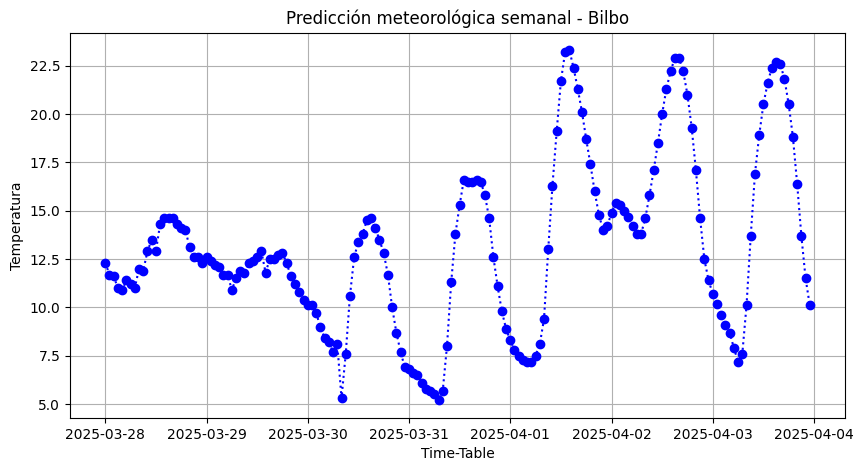

In [8]:
plt.figure(figsize=(10,5))

plt.plot(fecha,Temperature, linestyle=':', color='blue', marker='o', label='')
sns


plt.title("Predicción meteorológica semanal - Bilbo")
plt.xlabel("Time-Table")
plt.ylabel("Temperatura")
#set_xticklabels(rotation=45)
#plt.xlim(0,100)

#plt.legend(loc='lower right')

plt.grid(True)

plt.show()
